# Glass Identification Project

### 1.Data Collection   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import (KFold, StratifiedKFold, GridSearchCV, learning_curve, validation_curve)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA 
from sklearn.base import TransformerMixin 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from collections import Counter

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", header=None)  
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


As we saw the first raw of data was itself a header , so we fixed it and now we will move ahead with adding necessary attributes to the data(i.e column names).

In [6]:
column_names = [
    "Id number",
    "RI",
    "Na",
    "Mg",
    "Al",
    "Si",
    "K",
    "Ca",
    "Ba",
    "Fe",
    "Type of glass"
]

df.columns = column_names
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


We have added Attributes to the columns.

In [7]:
df.head(15)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [8]:
df.tail(15)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
199,200,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.0,7
200,201,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.0,7
201,202,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.00,0.0,7
202,203,1.51514,14.85,0.0,2.42,73.72,0.00,8.39,0.56,0.0,7
203,204,1.51658,14.80,0.0,1.99,73.11,0.00,8.28,1.71,0.0,7
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7


In [9]:
df_copy = df.copy()
df_copy

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### <font color="Skin">2.Data Exploration</font>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [11]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


__Certainly, here's are a few insights about the dataset:__

>- Descriptive statistics for the features show variations in the range of values across different attributes. For example, the     'Si' attribute has a mean value of 72.65, while 'Fe' has a mean value of 0.057, indicating the need for feature scaling  or     normalization to ensure that all features are on the same scale we will do it in further part.

>- The 'glass_type' values range from 1 to 7, with corresponding labels for different glass types. This is a multi-class           classification problem, where the goal is to predict the type of glass based on its chemical properties.

>- The dataset appears to be relatively small but complete, which makes it suitable for building and training classification       models.

In [12]:
df.shape

(214, 11)

The dataset contains 214 observations (rows) and 11 columns along with 10 feature columns and the target column 'glass_type.'

In [13]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

- The features represent various chemical properties of glass, including the refractive index (RI) and the weight percentage of   elements like Sodium (Na), Magnesium (Mg), Aluminum (Al), Silicon (Si), Potassium (K), Calcium (Ca), Barium (Ba), and Iron       (Fe).
- There are 2 Datatypes in the data : float64 & int64.

In [14]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: >

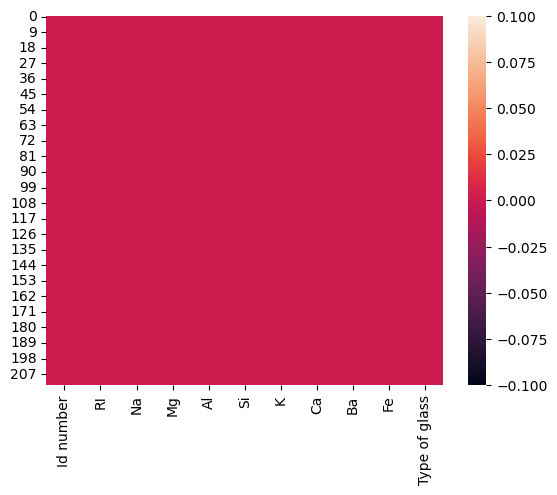

In [15]:
sns.heatmap(df.isnull())

There are no missing values in the dataset, indicating that it is complete and does not require imputation.

In [16]:
df.isin([' ','?','-','null','NA']).sum().any()

False

There are no white spaces in the dataset, indicating that it is complete and does not require imputation.

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58   

In [18]:
df.nunique().to_frame('Number of Unique values in the Dataset:')

,Number of Unique values in the Dataset:
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [19]:
df=df.drop('Id number',1)
df.head(5)

C:\Users\Mahima\AppData\Local\Temp\ipykernel_10360\3686640684.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Id number',1)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


__Here We can see theres a huge imbalance in the classes.__
>- Class 1 and 2 have the consists much higher glass.
>- Class 7 has approx half of glasses as that of Class 1 and 2
>- Class 3, 2 and 6 consists lowest glasses respectively.

We will address the issue in later part.

In [20]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type of glass']

X = df[features]
y = df[label]   

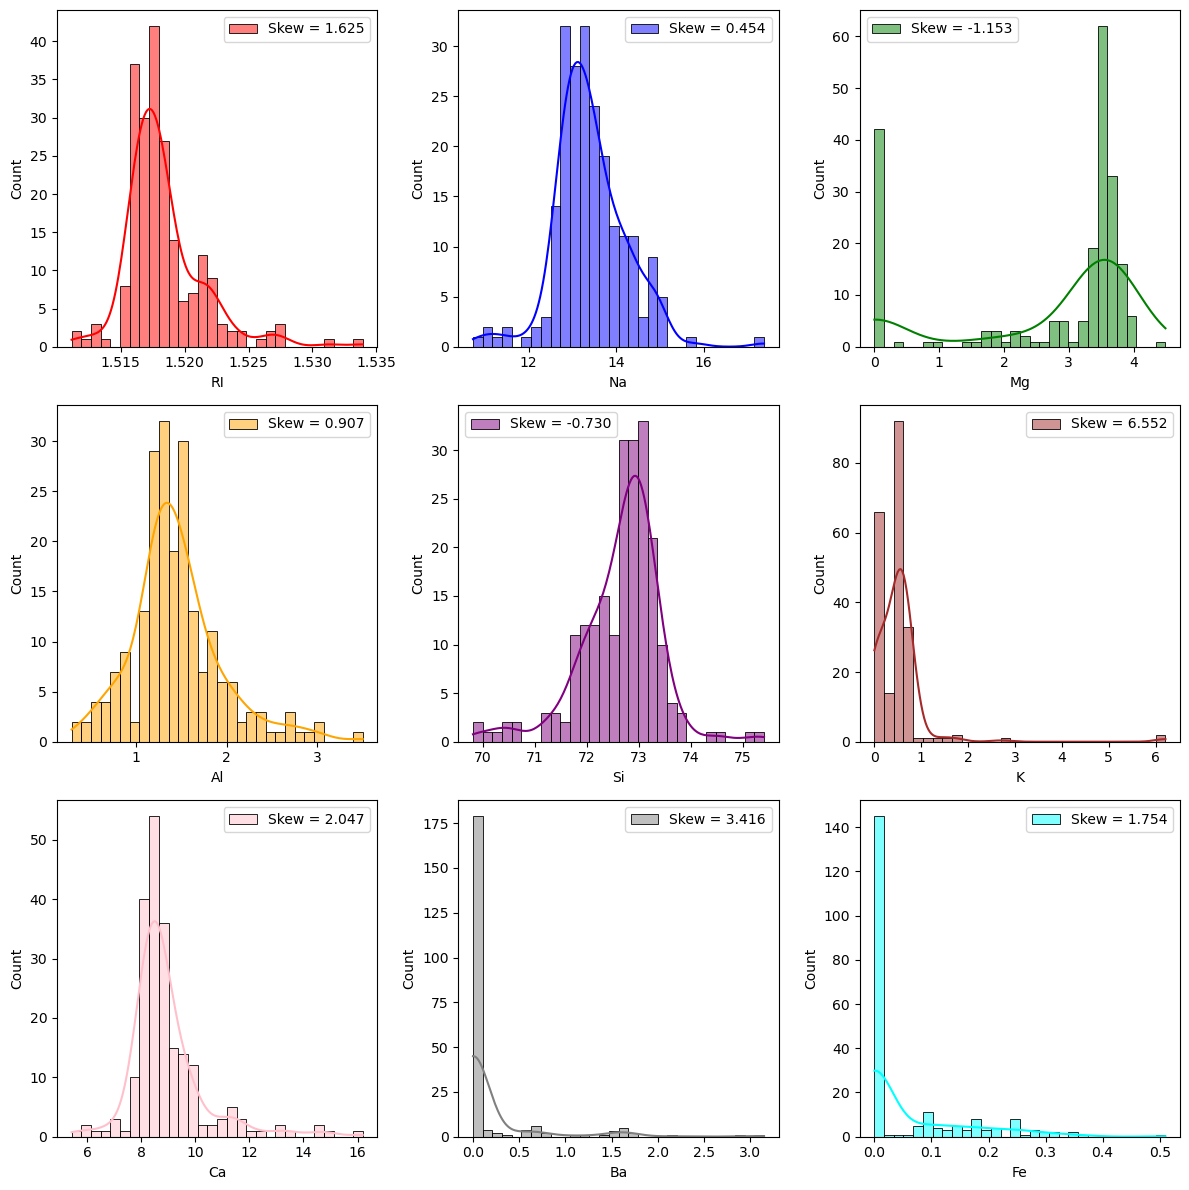

In [21]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, feat in enumerate(features):
    row, col = divmod(i, 3)
    skew = df[feat].skew()
    sns.histplot(df[feat], kde=True, label=f'Skew = {skew:.3f}', bins=30, color=colors[i], ax=axes[row, col])
    axes[row, col].set_xlabel(feat)
    axes[row, col].legend(loc='best')

plt.tight_layout()
plt.show()

__From the above graph we can see that:__

>- The data is skewed, not symmetrically distributed.
>- Data needs normalization due to varying scales.
>- 'Potassium (K)' and 'Barium (Ba)' may have outliers.
>- Features 'Fe,' 'Ba,' 'Ca,' and 'K' are highly skewed.
>- None of the features follow a normal distribution, which can affect modeling.

lets move ahead and get more insights into data.

<Figure size 800x800 with 0 Axes>

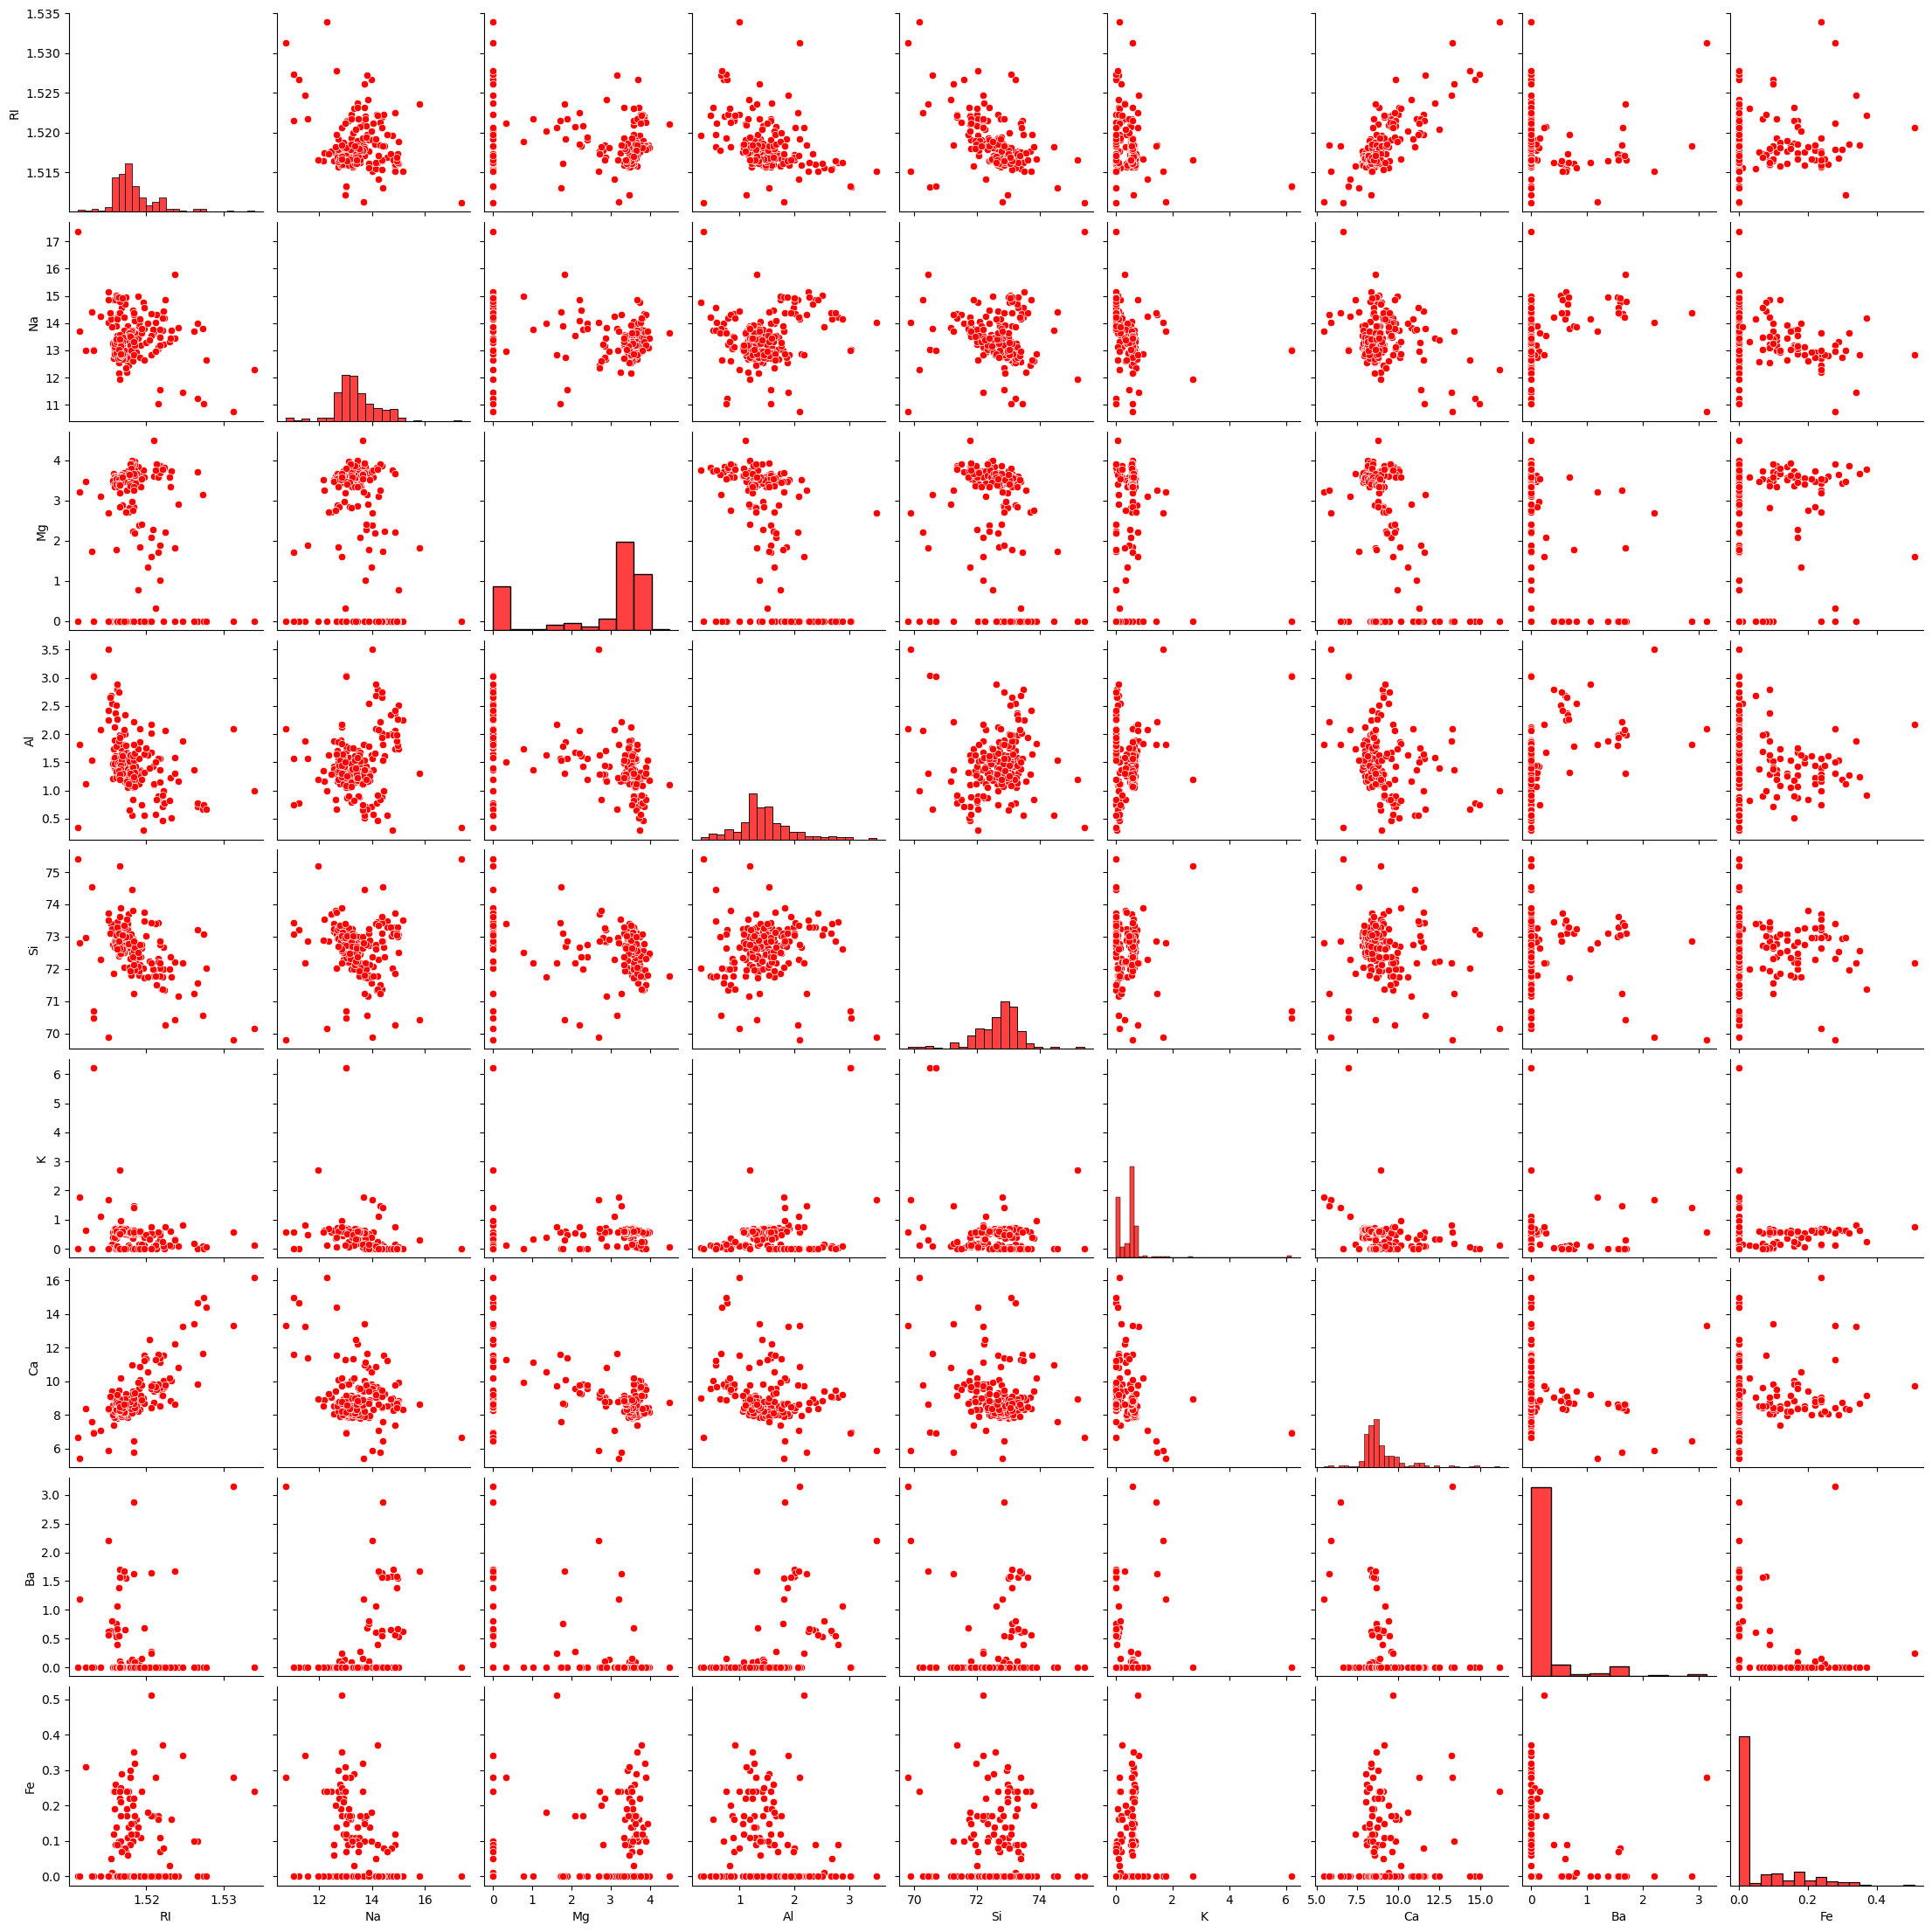

In [22]:
custom_palette = ['red']

x2 = pd.DataFrame(X)

plt.figure(figsize=(8, 8))
sns.set_palette(custom_palette)
sns.pairplot(data=x2)
plt.show()

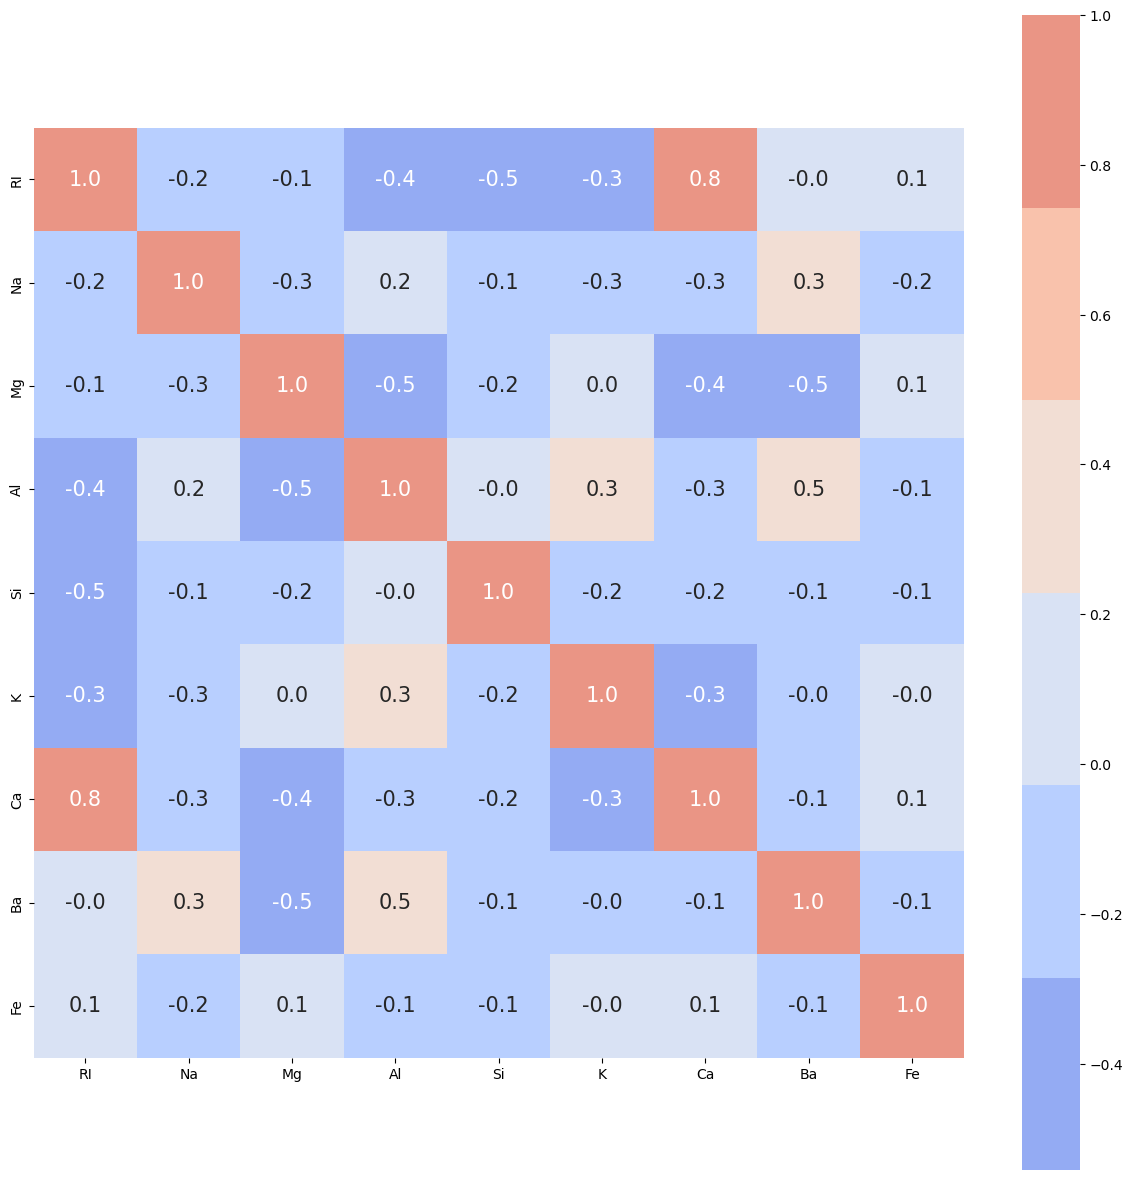

In [23]:
correlation = X.corr()
custom_palette = sns.color_palette("coolwarm")

plt.figure(figsize=(15, 15))

sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt='.1f', annot_kws={'size': 15},
            xticklabels=features, yticklabels=features, alpha=0.7, cmap=custom_palette)
plt.show()

__These observations emphasize pairs of features with significant correlations:__

- ___RI (Refractive Index) and Ca (Calcium):___ These two features exhibit a strong positive correlation, indicating a significant relationship.it can have potential impact on modeling and the possibility of multicollinearity when using both features.

- ___Na (Sodium) and Ba (Barium):___ There is a moderate positive correlation between Na and Ba, suggesting a noteworthy connection between these two features. 

- ___Mg (Magnesium) and Al (Aluminum):___ Mg and Al have a strong negative correlation, highlighting a substantial inverse relationship.

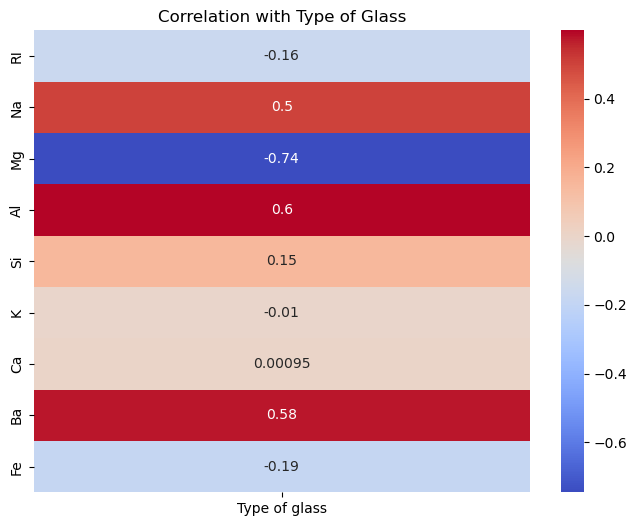

In [24]:
target_correlations = df.corr()['Type of glass'].drop('Type of glass')
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with Type of Glass')
plt.show()

__These comments focus on the most relevant feature-target correlations and their potential significance in predicting 'Type of glass':__

- _Na (Sodium)_: Moderately positively correlated with 'Type of glass,' suggesting a potential influence on glass type.

- _Al (Aluminum)_: Strong positive correlation with 'Type of glass,' indicating a significant relationship affecting glass         classification.

- _Ba (Barium)_: Strong positive correlation with 'Type of glass,' signifying its importance in determining glass type.

- _Mg (Magnesium)_: Strong negative correlation with 'Type of glass,' highlighting its substantial inverse impact on glass         classification.

In [25]:
from collections import Counter

def outlier_hunt(df):
    """
    Finds observations with more than 2 potential outliers using the IQR method.
    """
    outlier_indices = []

    for col in df.columns:
        # Calculate the first quartile (Q1) and third quartile (Q3).
        Q1, Q3 = np.percentile(df[col], [25, 75])
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        # Identify observations.
        potential_outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # Add indices 
        outlier_indices.extend(potential_outliers)

    # Count 
    outlier_counts = Counter(outlier_indices)
    multiple_outliers = [index for index, count in outlier_counts.items() if count > 2]

    return multiple_outliers

print('The dataframe contains %d observations with more than 2 potential outliers' % len(outlier_hunt(df)))

The dataframe contains 25 observations with more than 2 potential outliers


In [26]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)

print(df.shape)

(200, 10)


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [29]:
y.head(2)

,Type of glass
0,1
1,1


In [30]:
from sklearn import preprocessing
X=preprocessing.scale(X)

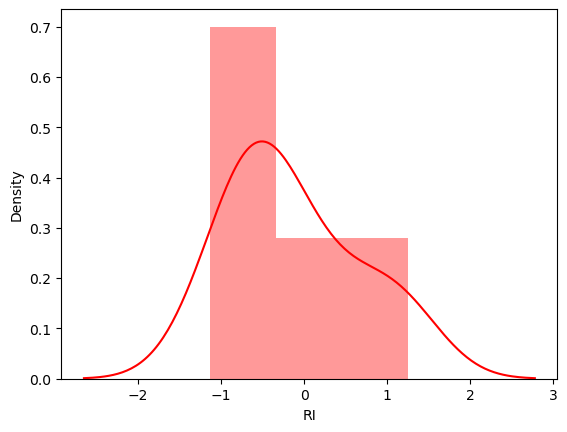

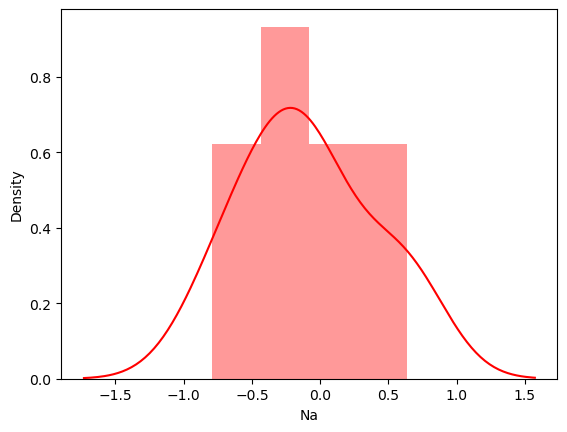

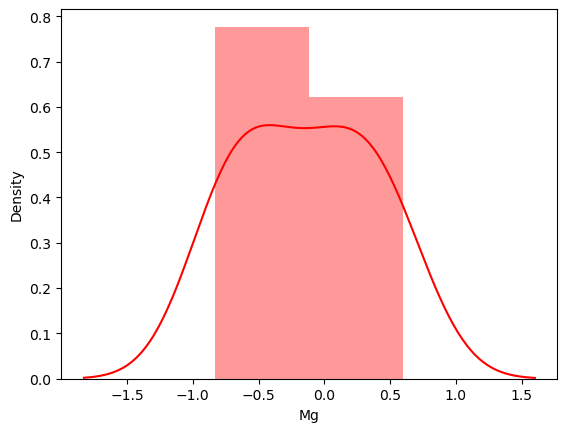

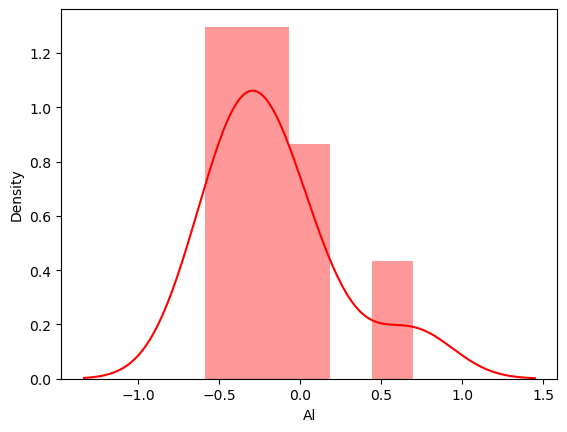

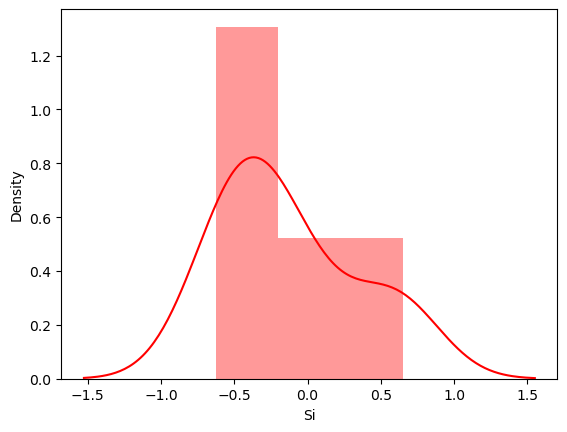

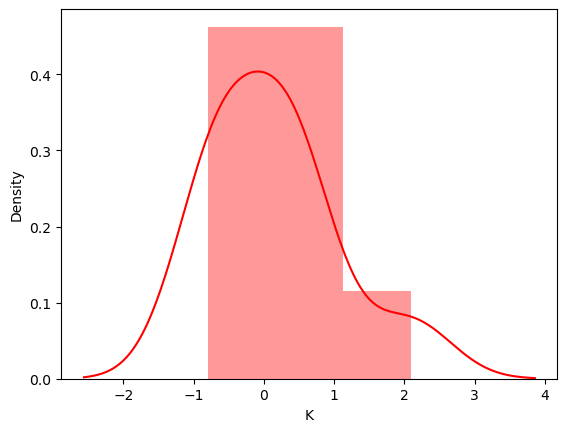

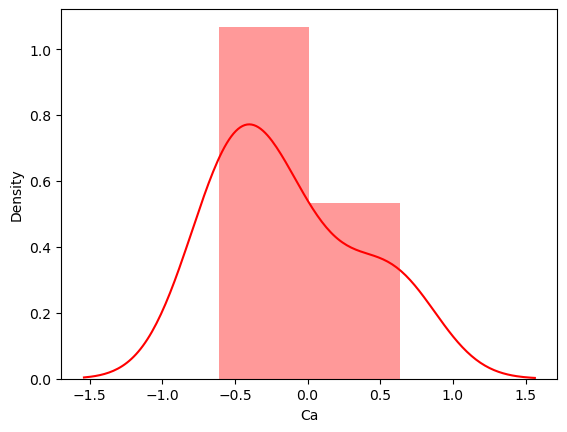

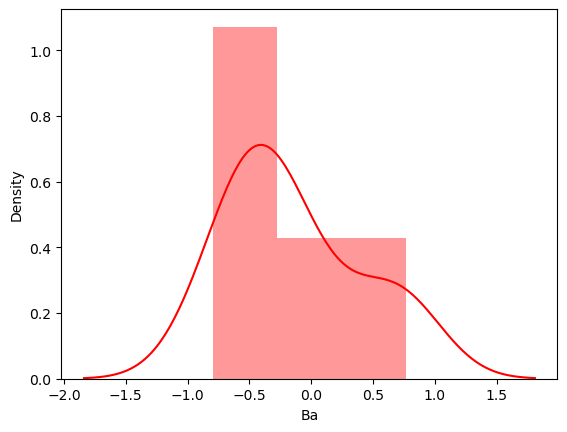

In [31]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
x2 = X

for i in range(8):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show() 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))
     

Shape of X_train = (149, 9)
Shape of X_test = (65, 9)
Shape of y_train = (149,)
Shape of y_test = (65,)


In [35]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB())
]

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{report}')
    print('-' * 40)

Random Forest:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.95      0.86        19
           2       0.83      0.83      0.83        23
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.85        65
   macro avg       0.89      0.80      0.81        65
weighted avg       0.86      0.85      0.84        65

----------------------------------------
Support Vector Machine:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         6
           6       0.50      0

In [ ]:
import joblib
joblib.dump(RandomForestClassifier(), 'rf_model.pkl')

# Conclusion
Random Forest Classifier is the best model with 85 % accuracy.